# Supermarket sales analysis 

 The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. The data used in this project is from Kaggle.
Predictive data analytics will be done on this data.

1. Load data
2. Data Cleaning
3. Analysis
    - Which product lines are top sellers; in sales and quantity
    - Which is the most preferred mode of payment, per gender
    - Which customers(gender, customer type) spend the most and on what products
    - Which branch sold which products more
    - What day of the week has the most sales
    - Average spend per gender group and item

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
from datetime import datetime

# 1. Load data

In [96]:
df = pd.read_csv('salesfinal.csv',encoding = 'utf-8')
df

#loading the csv file into the notebook.

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Month,Week day,Week,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.78,457.44,1-Jan-2019-Tue,Jan,Tue,1,0.443750,Credit card,435.66,4.76,21.78,6.9
1,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.04,399.76,1-Jan-2019-Tue,Jan,Tue,1,0.615972,Cash,380.72,4.76,19.04,5.7
2,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.41,470.67,1-Jan-2019-Tue,Jan,Tue,1,0.796528,Cash,448.26,4.76,22.41,6.7
3,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.49,388.29,1-Jan-2019-Tue,Jan,Tue,1,0.825000,Credit card,369.80,4.76,18.49,7.0
4,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.32,132.76,1-Jan-2019-Tue,Jan,Tue,1,0.660417,Cash,126.44,4.76,6.32,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,642-61-4706,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.34,196.14,30-Mar-2019-Sat,Mar,Sat,13,0.690278,Cash,186.80,4.76,9.34,5.5
996,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.07,85.51,30-Mar-2019-Sat,Mar,Sat,13,0.535417,Credit card,81.44,4.76,4.07,9.5
997,291-55-6563,A,Yangon,Member,Female,Home and lifestyle,34.42,6,10.33,216.85,30-Mar-2019-Sat,Mar,Sat,13,0.531250,Ewallet,206.52,4.76,10.33,7.5
998,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.37,469.77,30-Mar-2019-Sat,Mar,Sat,13,0.429167,Cash,447.40,4.76,22.37,7.4


In [97]:
df.head()
#to check the first five rows of the dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Month,Week day,Week,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.78,457.44,1-Jan-2019-Tue,Jan,Tue,1,0.443750,Credit card,435.66,4.76,21.78,6.9
1,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.04,399.76,1-Jan-2019-Tue,Jan,Tue,1,0.615972,Cash,380.72,4.76,19.04,5.7
2,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.41,470.67,1-Jan-2019-Tue,Jan,Tue,1,0.796528,Cash,448.26,4.76,22.41,6.7
3,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.49,388.29,1-Jan-2019-Tue,Jan,Tue,1,0.825000,Credit card,369.80,4.76,18.49,7.0
4,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.32,132.76,1-Jan-2019-Tue,Jan,Tue,1,0.660417,Cash,126.44,4.76,6.32,8.5


In [98]:
df.tail()
#to check the last 5 rows of the dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Month,Week day,Week,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,642-61-4706,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.34,196.14,30-Mar-2019-Sat,Mar,Sat,13,0.690278,Cash,186.80,4.76,9.34,5.5
996,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.07,85.51,30-Mar-2019-Sat,Mar,Sat,13,0.535417,Credit card,81.44,4.76,4.07,9.5
997,291-55-6563,A,Yangon,Member,Female,Home and lifestyle,34.42,6,10.33,216.85,30-Mar-2019-Sat,Mar,Sat,13,0.531250,Ewallet,206.52,4.76,10.33,7.5
998,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.37,469.77,30-Mar-2019-Sat,Mar,Sat,13,0.429167,Cash,447.40,4.76,22.37,7.4
999,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.52,304.98,30-Mar-2019-Sat,Mar,Sat,13,0.859028,Cash,290.46,4.76,14.52,6.7


In [99]:
df.info()
#to show the dataset summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Month                    1000 non-null   object 
 12  Week day                 1000 non-null   object 
 13  Week                     1000 non-null   int64  
 14  Time                     

In [100]:
df.isnull().sum()
# checking for missing values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Month                      0
Week day                   0
Week                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [101]:
df.columns
# to show the columnns in the dataset

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Month', 'Week day', 'Week', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [102]:
df.describe()
#to show the numerical information of each column

,Unit price,Quantity,Tax 5%,Total,Week,Time,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.380050,322.967430,7.12900,0.642151,307.58738,4.760000e+00,15.380050,6.97270
std,26.494628,2.923431,11.709047,245.885557,3.59239,0.133005,234.17651,1.208527e-13,11.709047,1.71858
min,10.080000,1.000000,0.510000,10.680000,1.00000,0.416667,10.17000,4.760000e+00,0.510000,4.00000
25%,32.875000,3.000000,5.927500,124.425000,4.00000,0.529861,118.49750,4.760000e+00,5.927500,5.50000
50%,55.230000,5.000000,12.090000,253.850000,7.00000,0.638194,241.76000,4.760000e+00,12.090000,7.00000
75%,77.935000,8.000000,22.445000,471.350000,10.00000,0.760417,448.90500,4.760000e+00,22.445000,8.50000
max,99.960000,10.000000,49.650000,1042.650000,13.00000,0.874306,993.00000,4.760000e+00,49.650000,10.00000


In [103]:
df.shape
#to check the shape of the dataset - how many rows and columns

(1000, 20)

In [104]:
df.duplicated().sum()
#checking for duplicated values

0

# 2. Cleaning data

In [105]:
df.drop(columns = ["Tax 5%","gross margin percentage", "gross income","Invoice ID","Rating"])

#removing the columns that I will not use for the analysis.

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Month,Week day,Week,Time,Payment,cogs
0,A,Yangon,Normal,Male,Sports and travel,72.61,6,457.44,1-Jan-2019-Tue,Jan,Tue,1,0.443750,Credit card,435.66
1,A,Yangon,Member,Male,Home and lifestyle,47.59,8,399.76,1-Jan-2019-Tue,Jan,Tue,1,0.615972,Cash,380.72
2,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,470.67,1-Jan-2019-Tue,Jan,Tue,1,0.796528,Cash,448.26
3,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,388.29,1-Jan-2019-Tue,Jan,Tue,1,0.825000,Credit card,369.80
4,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,132.76,1-Jan-2019-Tue,Jan,Tue,1,0.660417,Cash,126.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,B,Mandalay,Member,Male,Food and beverages,93.40,2,196.14,30-Mar-2019-Sat,Mar,Sat,13,0.690278,Cash,186.80
996,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,85.51,30-Mar-2019-Sat,Mar,Sat,13,0.535417,Credit card,81.44
997,A,Yangon,Member,Female,Home and lifestyle,34.42,6,216.85,30-Mar-2019-Sat,Mar,Sat,13,0.531250,Ewallet,206.52
998,A,Yangon,Normal,Female,Sports and travel,89.48,5,469.77,30-Mar-2019-Sat,Mar,Sat,13,0.429167,Cash,447.40


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Month                    1000 non-null   object 
 12  Week day                 1000 non-null   object 
 13  Week                     1000 non-null   int64  
 14  Time                     

# 3. Data Analysis

## Which is top selling product line by total sales?

In [163]:
top_sale = pd.DataFrame(df.groupby('Product line').sum()['Total'])
#grouping data by product line

top_sale.sort_values(by=['Total'], inplace=True, ascending=False)
# Sorting the data in descending order

top_sale[:]
#sorting by sales

,Total
Product line,
Food and beverages,56144.96
Sports and travel,55123.00
Electronic accessories,54337.64
Fashion accessories,54306.03
Home and lifestyle,53861.96
Health and beauty,49193.84


<function matplotlib.pyplot.show(close=None, block=None)>

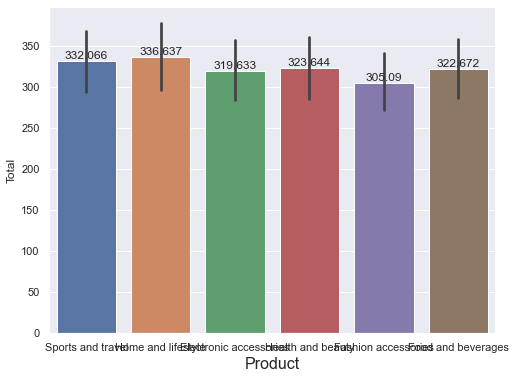

In [167]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="Product line",y="Total",data=df)
plt.xlabel("Product", size=16)
plt.bar_label(splot.containers[0])
plt.show

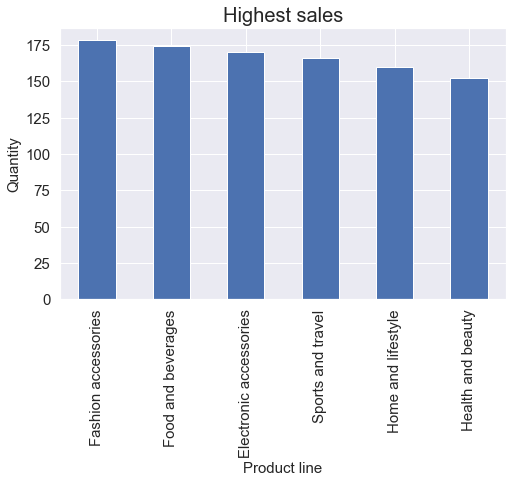

In [162]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Highest sales",fontsize=20)
plt.ylabel("Quantity",fontsize=15)
df["Product line"].value_counts(ascending=False).plot(kind='bar',fontsize=15,ax=ax)
plt.xlabel("Product line",fontsize=15)
plt.show()

### Conclusion
- The top selling product by total sales is Food and Beverages at $56,144.84. 
- This analysis can be used to guide on ad spend. It enables the business to decide what product needs more advertisement.

 ## Which are the top and least selling product lines ?

### Conclusion
- The top selling product line is 'Fashion Accessories' while the least selling product line is 'Health and Beauty'.
- This analysis is done to help inform decisions on inventory and to know what to stock in larger quantities.



## Which product line sold the most quantity?

In [109]:
top_product = pd.DataFrame(df.groupby('Product line').sum()['Quantity'])
#grouping data by product line

top_product.sort_values(by=['Quantity'], inplace=True, ascending=False)
# Sorting the data in descending order

top_product[:]
#sorting by sales

,Quantity
Product line,
Electronic accessories,971
Food and beverages,952
Sports and travel,920
Home and lifestyle,911
Fashion accessories,902
Health and beauty,854


### Conclusion
- The product line that sold the most quantity of goods was Electronic and Accessories, which sold 971 goods.
- This can inform decisions on inventory.

## Which is the most preferred mode of payment?

In [143]:
preferred_payment = pd.DataFrame(df.groupby('Payment').sum()['Total'])
#grouping data by mode of payment
preferred_payment.sort_values(by=['Total'], inplace=True, ascending=False)
# Sorting the data in descending order
preferred_payment[:]


,Total
Payment,
Cash,112206.76
Ewallet,109993.38
Credit card,100767.29


### Conclusion
- Cash was the most preferred mode of payment.

## Which is the most preferred payment mode per gender?(which mode of payment brings more revenue)

In [146]:
gender_payment_mode = pd.DataFrame(df.groupby(['Gender','Payment']).sum()['Total'])
#grouping data by gender and mode of payment
gender_payment_mode.sort_values(['Gender','Total'], ascending=False)
#sorting the values by gender and total
gender_payment_mode[:]

Total
Gender Payment              
Female Cash         59514.30
       Credit card  53498.58
       Ewallet      54870.38
Male   Cash         52692.46
       Credit card  47268.71
       Ewallet      55123.00

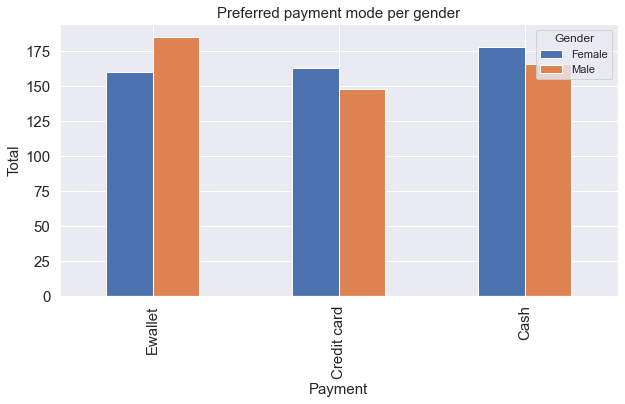

In [90]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Preferred payment mode per gender",fontsize=15)
plt.ylabel("Total",fontsize=15)
df.groupby(["Gender","Payment"]).size().unstack("Gender","Payment").sort_values(ascending=False, by = "Payment").plot(kind="bar",ax=ax,fontsize=15)
plt.xlabel("Payment",fontsize=15)
plt.show()

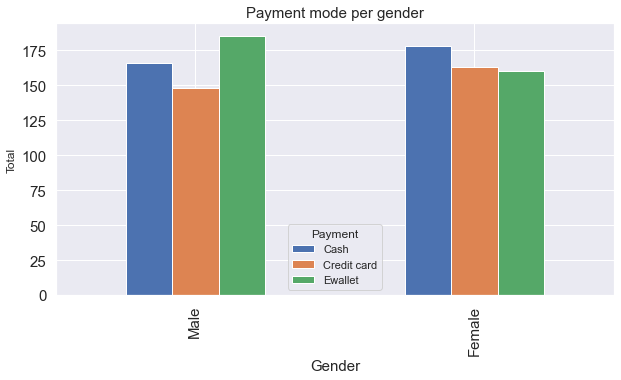

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Payment mode per gender",fontsize=15)
plt.ylabel("Total",fontsize=12)
df.groupby(["Payment","Gender"]).size().unstack("Payment","Gender").sort_values(ascending=False, by = "Gender").plot(kind="bar",ax=ax,fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.show()

### Conclusion
- The most preferred mode of payment for men is 'Ewallet' while women prefer 'Cash'.  Credit card was the least preferred payment mode for both genders.
- This analysis shows the customers' preferred modes of payment. This can help the business tailor their payment options. 

## Which gender spent the most ?

In [114]:
top_spender = pd.DataFrame(df.groupby(['Gender']).sum()['Total'])
#grouping data by gender

top_spender.sort_values(by=['Total'], inplace=True, ascending=False)
#sorting data in descending order

top_spender[:]

,Total
Gender,
Female,167883.26
Male,155084.17


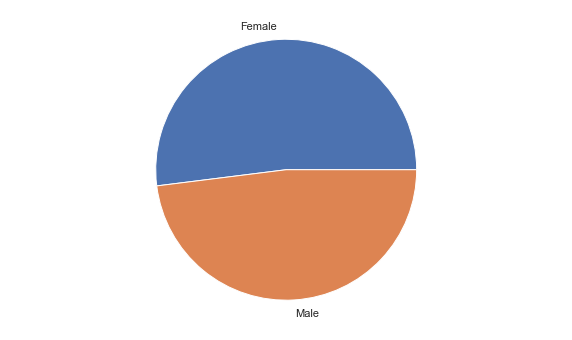

In [115]:
fig = plt.subplots(figsize =(10, 6))
sums = df.groupby(df["Gender"])["Total"].sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index);
plt.show()


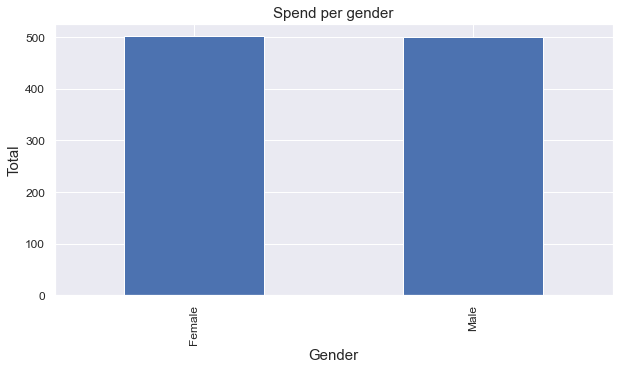

In [158]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title("Spend per gender",fontsize=15)
plt.ylabel("Total",fontsize=15)
time=df["Gender"].value_counts()
time.plot(kind="bar",ax=ax,fontsize=12)
plt.xlabel("Gender",fontsize=15)
plt.show()

### Conclusion
- Female customers brought in the most revenue.
- This insights can be used to inform decisions on advertising, marketing and branding.


## Which gender spent the most money on what?

In [117]:
gender_spend = pd.DataFrame(df.groupby(['Gender', 'Product line']).sum()['Total'])
#grouping data by gender
gender_spend.sort_values(['Gender','Total'], ascending=False)
#sorting the values by gender and total

Total
Gender Product line                    
Male   Health and beauty       30632.83
       Electronic accessories  27235.57
       Sports and travel       26548.19
       Fashion accessories     23868.57
       Home and lifestyle      23825.02
       Food and beverages      22973.99
Female Food and beverages      33170.97
       Fashion accessories     30437.46
       Home and lifestyle      30036.94
       Sports and travel       28574.81
       Electronic accessories  27102.07
       Health and beauty       18561.01

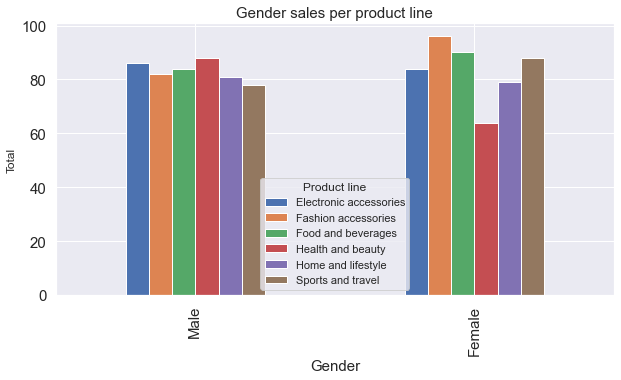

In [118]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Gender sales per product line",fontsize=15)
plt.ylabel("Total",fontsize=12)
df.groupby(["Product line","Gender"]).size().unstack("Product line","Gender").sort_values(ascending=False, by = "Gender").plot(kind="bar",ax=ax,fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.show()

### Conclusion
- Men spent the most money on 'Health and Beauty' and the least on 'Food and Beverages'.
- Women spent the most money on 'Food and Beverages' and the least on 'Health and Beauty'.
- This can be used to inform decisions on targeted advertising and recommending products to buy.

### How many customers are members, per gender?

In [119]:
customer_type = pd.DataFrame(df.groupby(['Customer type', 'Gender']).sum()['Total'])
#grouping data by customer type
customer_type.sort_values(['Customer type','Gender','Total'], ascending=False)
#sorting the values by customer type,gender and total

Total
Customer type Gender          
Normal        Male    79007.48
              Female  79736.14
Member        Male    76076.69
              Female  88147.12

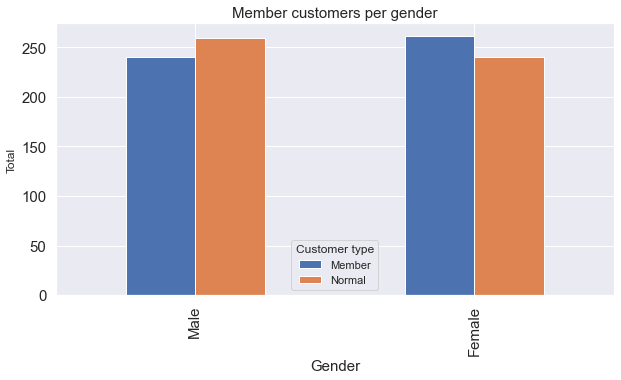

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Member customers per gender",fontsize=15)
plt.ylabel("Total",fontsize=12)
df.groupby(["Customer type","Gender"]).size().unstack("Customer type","Gender").sort_values(ascending=False, by = "Gender").plot(kind="bar",ax=ax,fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.show()

### Conclusion
- Women have a higher membership rate than men.
- The analysis above can be used to inform decisions on customer loyalty programs, its benefits and can also be used to collect data on customers, improve targeted advertisements and also to tailor voucher programs based on the customer history. 

## Which branch made the highest sales?

In [121]:
branch_sales = pd.DataFrame(df.groupby(['Branch']).sum()['Total'])
#grouping data by branch
branch_sales.sort_values(['Branch','Total'], ascending=False)
#sorting the values by branch,product line and total

,Total
Branch,
C,110568.86
B,106198.00
A,106200.57


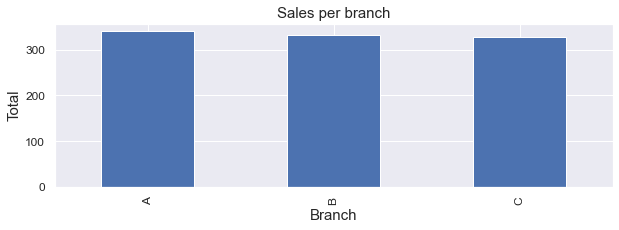

In [122]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.title("Sales per branch",fontsize=15)
plt.ylabel("Total",fontsize=15)
time=df["Branch"].value_counts().sort_values(ascending=False)
time.plot(kind="bar",ax=ax,fontsize=12)
plt.xlabel("Branch",fontsize=15)
plt.show()

### Conclusion
- Branch C has the highest sales, followed by A then B.
- This information can be used to inform decisions on marketing,inventory and budgeting.

## Which branch sold which products more?

In [123]:
branch_sales = pd.DataFrame(df.groupby(['Branch', 'Product line']).sum()['Total'])
#grouping data by branch
branch_sales.sort_values(['Branch', 'Product line','Total'], ascending=False)
#sorting the values by branch,product line and total

Total
Branch Product line                    
C      Sports and travel       15761.99
       Home and lifestyle      13895.54
       Health and beauty       16615.35
       Food and beverages      23766.88
       Fashion accessories     21560.11
       Electronic accessories  18968.99
B      Sports and travel       19988.26
       Home and lifestyle      17549.21
       Health and beauty       19980.70
       Food and beverages      15214.93
       Fashion accessories     16413.38
       Electronic accessories  17051.52
A      Sports and travel       19372.75
       Home and lifestyle      22417.21
       Health and beauty       12597.79
       Food and beverages      17163.15
       Fashion accessories     16332.54
       Electronic accessories  18317.13

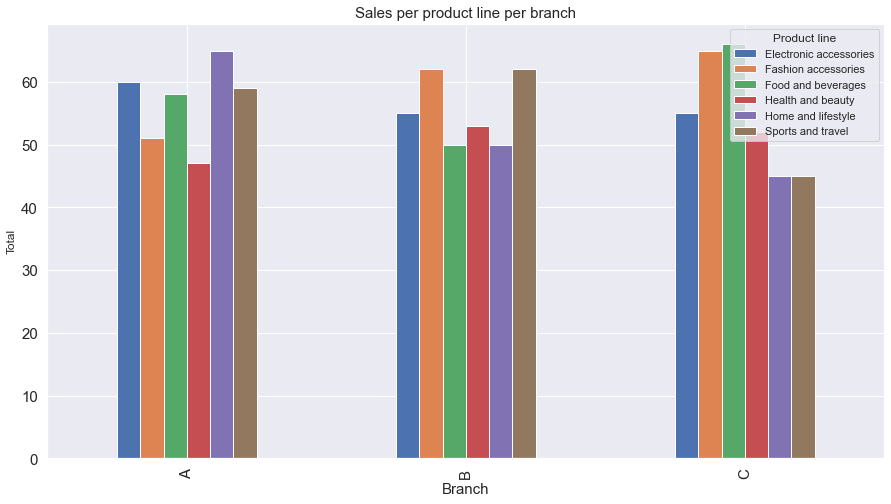

In [124]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.title("Sales per product line per branch",fontsize=15)
plt.ylabel("Total",fontsize=12)
df.groupby(["Product line","Branch"]).size().unstack("Product line","Branch").sort_values(ascending=True, by = "Branch").plot(kind="bar",ax=ax,fontsize=15)
plt.xlabel("Branch",fontsize=15)
plt.show()

### Conclusion
- This analysis was done to show which branch sold which product the most:
  - Branch A sold Home and Lifestyle products the most.
  - Branch B sold Sports and Travel products the most.
  - Branch C sold Food and Beverage products the most.
  - This can be used to inform decisions around inventory and budgets.
  - It can also be used for cross-sell recommendations.


## Which month had the most sales?


In [125]:
branch_sales = pd.DataFrame(df.groupby(['Month','Product line' ]).sum()['Total'])
#grouping data by month
branch_sales.sort_values(['Month','Product line'])
#sorting the values by month,product line and total


Total
Month Product line                    
Feb   Electronic accessories  17362.93
      Fashion accessories     19009.92
      Food and beverages      20000.39
      Health and beauty       14602.29
      Home and lifestyle      12434.38
      Sports and travel       13809.67
Jan   Electronic accessories  18831.33
      Fashion accessories     19345.14
      Food and beverages      19570.58
      Health and beauty       16383.20
      Home and lifestyle      20494.77
      Sports and travel       21667.09
Mar   Electronic accessories  18143.38
      Fashion accessories     15950.97
      Food and beverages      16573.99
      Health and beauty       18208.35
      Home and lifestyle      20932.81
      Sports and travel       19646.24

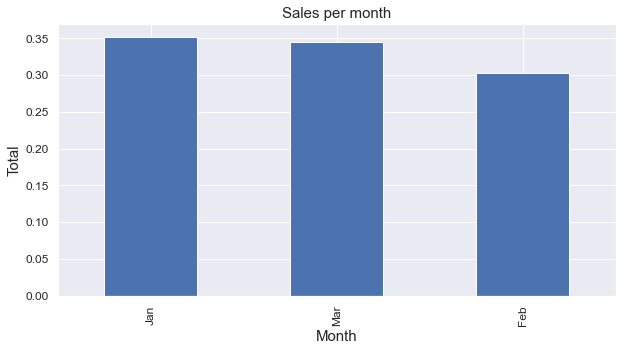

In [126]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Sales per month",fontsize=15)
plt.ylabel("Total",fontsize=15)
time=df["Month"].value_counts('Total')
time.plot(kind="bar",ax=ax,fontsize=12)
plt.xlabel("Month",fontsize=15)
plt.show()

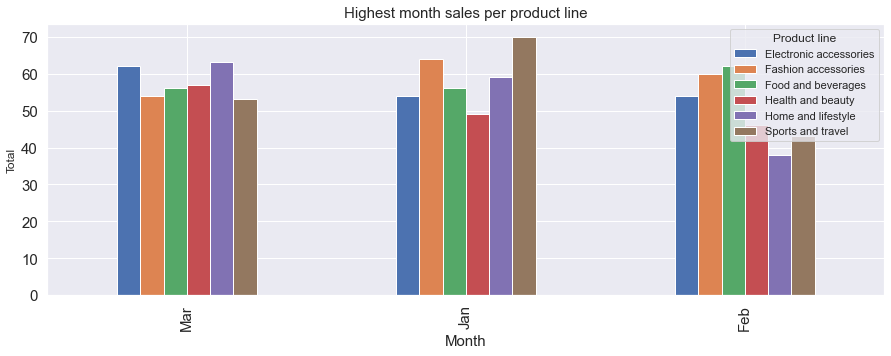

In [127]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title("Highest month sales per product line",fontsize=15)
plt.ylabel("Total",fontsize=12)
df.groupby(["Product line","Month"]).size().unstack("Product line","Month").sort_values(ascending=False, by = "Month").plot(kind="bar",ax=ax,fontsize=15)
plt.xlabel("Month",fontsize=15)
plt.show()

### Conclusion
- January had the most sales, followed by March then February.
- The highest selling products were:
  - January - Sports and Travel
  - February - Food and Beverages
  - March - Home and Lifestyle
- This data can be used to inform decisions on staffing needs,inventory and budgeting.

##  Which week had the highest sales per product line?
1. Analysis to show which week had the highest sales in total.
2. Analysis to show the sales, per product for over the 13 week period.

In [138]:
week_sales = pd.DataFrame(df.groupby(['Week']).sum()['Total'])
#grouping data by week
week_sales.sort_values(['Total','Week'], ascending=False)
#sorting the values by week and total

,Total
Week,
10,30108.88
6,29428.81
4,28306.51
5,27528.47
3,27489.19
9,27089.03
2,25624.27
11,25177.20
12,23619.47


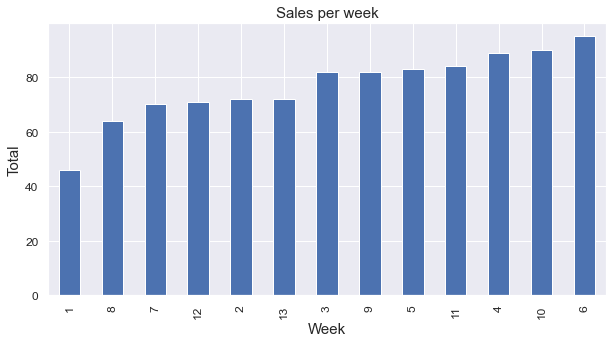

In [129]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Sales per week",fontsize=15)
plt.ylabel("Total",fontsize=15)
time=df["Week"].value_counts().sort_values(ascending=True)
time.plot(kind="bar",ax=ax,fontsize=12)
plt.xlabel("Week",fontsize=15)
plt.show()

In [131]:
week_sales = pd.DataFrame(df.groupby(['Week','Product line' ]).sum()['Total'])
#grouping data by week and product line
week_sales.sort_values(['Week','Product line'],ascending=False)
#sorting the values by week,product line 



Total
Week Product line                   
13   Sports and travel       1798.07
     Home and lifestyle      2116.14
     Health and beauty       6175.11
     Food and beverages      3843.15
     Fashion accessories     2657.75
...                              ...
1    Home and lifestyle      2642.86
     Health and beauty       2960.14
     Food and beverages      1403.25
     Fashion accessories     2026.44
     Electronic accessories  2917.04

[78 rows x 1 columns]

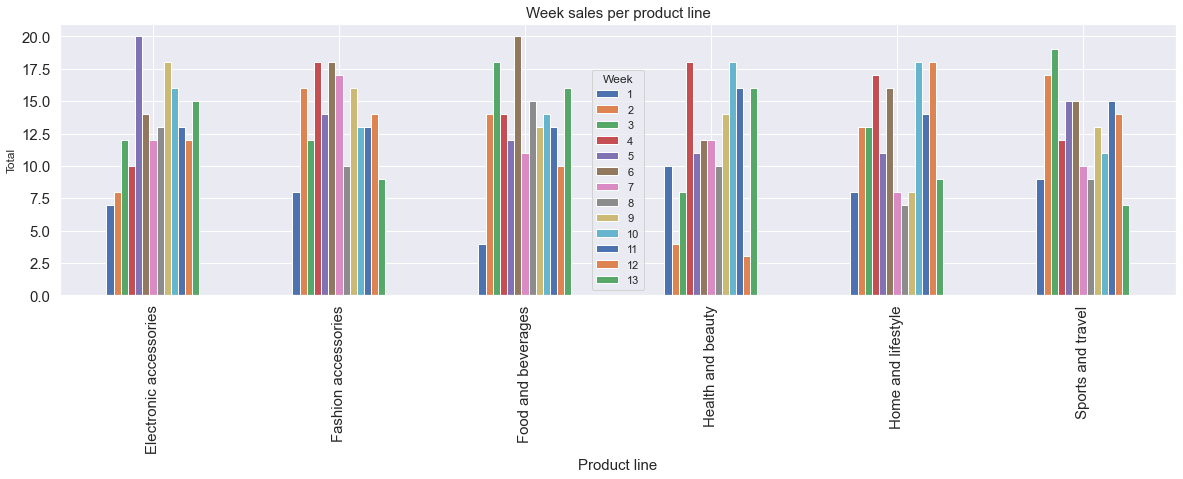

In [169]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.title("Week sales per product line",fontsize=15)
plt.ylabel("Total",fontsize=12)
df.groupby([ "Week","Product line"]).size().unstack( "Week","Product line").sort_values(ascending=True, by = "Product line").plot(kind="bar",ax=ax,fontsize=15)
plt.xlabel("Product line",fontsize=15)
plt.show()

### Conclusion
- There is no clear pattern in the sales of each individual product per week.
- There was a surge in the purchase of most products around week 4-6.